## Data Cleaning & Exploration

**The purpose of this notebook is to explore the provided data. You will also see the cleaneing, transforming, and pre-processing of the data in order to begin modeling.** 

Objectives:
1. View the data and make note of any observations

2. Clean up the data from any missing values or messy columns

3. Save new dataset as a csv file for the modeling phase of the analysis


In [1]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd

# Datatime Handling
import datetime
import os
import time


# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import first 10,000,000 rows of train and all test data
train = pd.read_csv('../CSV_Files/train.csv', nrows=10000000)
test = pd.read_csv('../CSV_Files/test.csv', index_col=0)

/Users/boimoriba/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.head() # previewing the data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [4]:
train.shape # viewing how large the data is

(10000000, 8)

In [5]:
train.info() # viewing the datatypes of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         object
attributed_time    object
is_attributed      int64
dtypes: int64(6), object(2)
memory usage: 610.4+ MB


In [6]:
train.isna().sum() # viewing the missing values

ip                       0
app                      0
device                   0
os                       0
channel                  0
click_time               0
attributed_time    9981283
is_attributed            0
dtype: int64

In [7]:
train.attributed_time.value_counts().head(4) # viewing the non missing values that have been labeled object

2017-11-06 23:36:23    6
2017-11-06 23:28:43    5
2017-11-07 00:12:00    5
2017-11-07 00:03:48    5
Name: attributed_time, dtype: int64

In [8]:
train.click_time[1:5] # viewing the next object column in the data

1    2017-11-06 14:33:34
2    2017-11-06 14:34:12
3    2017-11-06 14:34:52
4    2017-11-06 14:35:08
Name: click_time, dtype: object

In [9]:
train.attributed_time.isna().value_counts() # viewing the count for the missing values in column

True     9981283
False      18717
Name: attributed_time, dtype: int64

In [10]:
train.is_attributed.value_counts() # viewing the target

0    9981283
1      18717
Name: is_attributed, dtype: int64

# Quick Observation

The columns click_time and attributed_time need to be converted to datetime. There are some nans in the data that needs to be looked into; why is the data missing, and does it have anything to do with the target column is_attributed? 

The data is very imbalanced, the are more non-downloads than there are downloads. The data has already been encoded for us so that will not be done again.

                               Now lets take a look at the test data ...

In [11]:
test.head() # quick view of test data 

,ip,app,device,os,channel,click_time
click_id,,,,,,
0,5744,9,1,3,107,2017-11-10 04:00:00
1,119901,9,1,3,466,2017-11-10 04:00:00
2,72287,21,1,19,128,2017-11-10 04:00:00
3,78477,15,1,13,111,2017-11-10 04:00:00
4,123080,12,1,13,328,2017-11-10 04:00:00


In [12]:
test.shape # viewing how large the data is 

(18790469, 6)

In [13]:
test.info() # viewing the data types of the columns that make up the dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18790469 entries, 0 to 18790468
Data columns (total 6 columns):
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(5), object(1)
memory usage: 1003.5+ MB


In [14]:
test.isna().sum() # checking for missing values

ip            0
app           0
device        0
os            0
channel       0
click_time    0
dtype: int64

In [15]:
test.click_time.value_counts().head(3) # viewing the click_time column that has datatype of object

2017-11-10 09:00:10    1466
2017-11-10 09:00:11    1458
2017-11-10 14:01:14    1457
Name: click_time, dtype: int64

# Quick Observation 

Looks like click_time needs to be changed from object to datetime, other than that there are no issues with this data set, from what I can see.  

# Changing Date Columns From Objects To Datatime64 [ns]

In [16]:
# set click_time and attributed_time as timeseries
train['click_time'] = pd.to_datetime(train['click_time'])
train['attributed_time'] = pd.to_datetime(train['attributed_time'])
test['click_time'] = pd.to_datetime(test['click_time'])

In [20]:
# checking to see if the data types were changed
print('Test Info:')
print('\n')
print(test.info())
print('\n')
print('Train Info:')
print('\n')
print(train.info())

Test Info:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18790469 entries, 0 to 18790468
Data columns (total 6 columns):
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 1003.5 MB
None


Train Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         datetime64[ns]
attributed_time    datetime64[ns]
is_attributed      int64
dtypes: datetime64[ns](2), int64(6)
memory usage: 610.4 MB
None


# Nest Steps
After speaking with the DS 02172020 Cohort Coach Lindsey Berlin, and looking at how some of the TalkingData AdTracking Fraud Detection Challenge participants handled the data, my next steps will be:

1. Creating new time categorical features for the click_time column; day and hour.
2. Get rid of the missing values by dropping the attribute_time column all together. 

**Side Note: This will be done to avoid target leakage; if a model knows what time the app was downloaded then it could possibly learn that the app was in fact downloaded (that is our target, hence why this could lead to target leakage).**

**Side Note: When setting my X and y for modeling, from the columnn descriptions in the competition, it seems as though either is_attributed or attribute_time can be our target/y. The reason for the missing values is because there will be no recorded time for the app if it is not downloaded. To make things easier I will be using is_attributed being that there are no missing values.** 



# New Time Categorical Features

In [21]:
# creating new columns that contain click_time of the data in hour frequecy and day frequency
train['hour'] = pd.to_datetime(train.click_time).dt.hour.astype('uint8')
train['day'] = pd.to_datetime(train.click_time).dt.day.astype('uint8')

In [22]:
train.columns # checking if the new features were added 

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'hour', 'day'],
      dtype='object')

In [23]:
train.head() # quick view of the dataset 

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour,day
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0,14,6
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0,14,6
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0,14,6
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0,14,6
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0,14,6


# Dropping Unwanted Column
I want to drop the column temporarily just incase I want to use it later on. I will do this by assigning a new train df variable to the version of the original train dataset without the attribute time column.  

In [24]:
train_df = train.drop(columns='attributed_time') # assigning variable to df without unwanted column

In [25]:
train_df.head() # viewing of new df

,ip,app,device,os,channel,click_time,is_attributed,hour,day
0,83230,3,1,13,379,2017-11-06 14:32:21,0,14,6
1,17357,3,1,19,379,2017-11-06 14:33:34,0,14,6
2,35810,3,1,13,379,2017-11-06 14:34:12,0,14,6
3,45745,14,1,13,478,2017-11-06 14:34:52,0,14,6
4,161007,3,1,13,379,2017-11-06 14:35:08,0,14,6


In [28]:
train_df.isna().sum() # double checking for any missing values

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
hour             0
day              0
dtype: int64

In [31]:
train.describe() # quick viewing of the statistics of the data ie std, mean

,ip,app,device,os,channel,is_attributed,hour,day
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,8.733172e+04,1.285964e+01,3.303871e+01,2.460008e+01,2.526604e+02,1.871700e-03,1.812106e+01,6.069143e+00
std,5.567527e+04,1.652680e+01,3.088298e+02,6.159878e+01,1.300376e+02,4.322264e-02,5.653891e+00,2.536975e-01
min,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
25%,4.216400e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.340000e+02,0.000000e+00,1.600000e+01,6.000000e+00
50%,8.197300e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.370000e+02,0.000000e+00,1.800000e+01,6.000000e+00
75%,1.211870e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.770000e+02,0.000000e+00,2.200000e+01,6.000000e+00
max,2.127740e+05,6.750000e+02,3.545000e+03,7.450000e+02,4.980000e+02,1.000000e+00,2.300000e+01,7.000000e+00


# A Deeper Look Into Column Frequencies 
Which of the columns have the most values? Does the outcome have something to do with the user of a device?

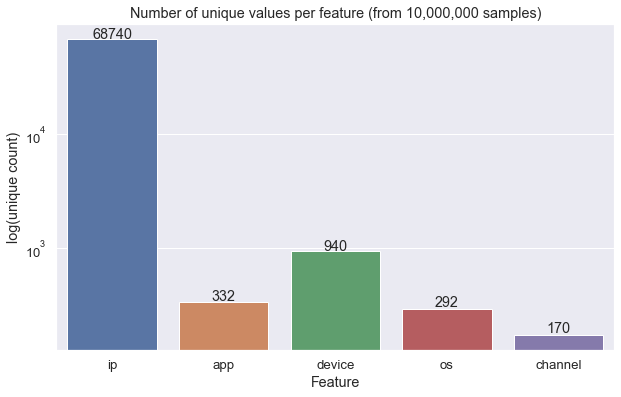

In [34]:
'''The code below was provided by a participant of the competition: 
https://www.kaggle.com/anokas/talkingdata-adtracking-eda is his link a description of his strategy 
when working with this dataset. It is also located in the resource section of the notebook
It was used to display the unique/non repeated values for each column'''

plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature (from 10,000,000 samples)')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 


# Quick Observation
I find it odd that there are more ip addresses than devices. I thought that one device had one ip address! But from looking online it says that sometimes when people have the same internet provider, IP addresses can be shared between more than one device, not suppose to be but it happens. 

*Out of Curiousity:* I want to see if there is any pattern in the hour or day of a download. I also want to look at the click time so see if there is a pattern there as well. 

# Time Categorical Feature: Day 

In [44]:
train_df.day.value_counts() # viewing how the days are destributed

6    9308568
7     691432
Name: day, dtype: int64

# Time Categorical Feature: Hour

In [45]:
train_df.hour.value_counts() # viewing how the ours are distributed 

23    2359612
16    2307777
17    1263348
22    1223530
18     738140
0      691432
21     509572
19     496354
20     409752
15        435
14         48
Name: hour, dtype: int64

# Click_Time

In [53]:
downloads = train_df[train_df['is_attributed']==1] # assigning the downloaded rows to a variable

In [67]:
downloads.click_time.value_counts().mean() # on average how many times a click_time is shown in the is_attributed data

1.476569895866204

In [70]:
downloads.click_time.value_counts().head(7) # the top 7 click_times that showed up the most amongst the downloads

2017-11-07 00:09:01    8
2017-11-07 00:05:21    7
2017-11-07 00:11:20    7
2017-11-06 16:08:17    7
2017-11-06 23:57:22    6
2017-11-06 16:06:46    6
2017-11-07 00:06:16    6
Name: click_time, dtype: int64

In [72]:
downloads.describe() # viewing the statistic of the downloads

,ip,app,device,os,channel,is_attributed,hour,day
count,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.0,18717.000000,18717.000000
mean,124570.909708,31.598333,32.910509,21.547684,223.390394,1.0,18.199338,6.070684
std,60469.241336,37.330917,211.297241,42.972383,107.240467,0.0,5.693765,0.256304
min,25.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,6.000000
25%,75282.000000,16.000000,1.000000,13.000000,145.000000,1.0,16.000000,6.000000
50%,137658.000000,19.000000,1.000000,19.000000,213.000000,1.0,19.000000,6.000000
75%,174804.000000,35.000000,1.000000,24.000000,274.000000,1.0,22.000000,6.000000
max,212767.000000,551.000000,3525.000000,607.000000,498.000000,1.0,23.000000,7.000000


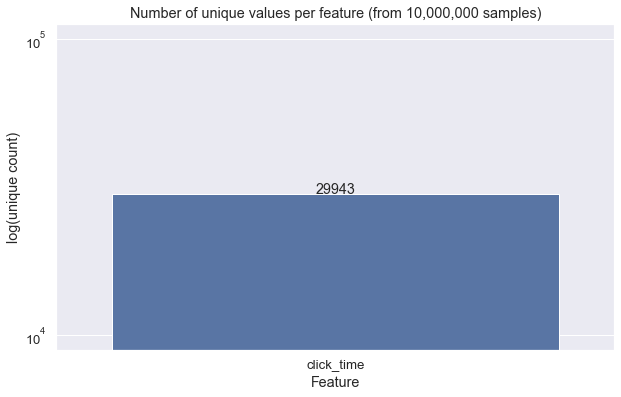

In [60]:
'''The code below was provided by a participant of the competition: 
https://www.kaggle.com/anokas/talkingdata-adtracking-eda is his link a description of his strategy 
when working with this dataset. It is also located in the resource section of the notebook
It was used to display the unique/non repeated values for a column'''

plt.figure(figsize=(10, 6))
cols = ['click_time']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature (from 10,000,000 samples)')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

# I wanted to see the actual count for the non-repeated/unique click_times 

In [73]:
# saving the transformed and cleaned data frames to csv files for modeling use
test.to_csv('cleaned_test')
train_df.to_csv('cleaned_train')

# Conclusion Of Notebook
I know that this problem is a binary classification problem that has imbalanced data. In order for the modeling process to go smoothly I wanted to remove anything in the data that may cause target leakage as well as missing data. After looking at the statistic of the data I can see that the scaling is very small but close enough to where a scaler is not needed during our modeling process. 

For the metrics we will be using the AUC (area under the curve). For a baseline model I am thinking of starting with a model that is able to handle unbalanced data for binary classification problems. My choice is Light Gradient Boost; note my choice of modeling is heavily influenced by the competition winners, the link below will direct you to there strategy.  

# Resources

1. **TalkingData AdTracking Fraud Detection Challenge:** https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data


2. **Winners of Competition Strategy:** https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/56475 


3. **Notebooks and blog post used to analysis this dataset:**


4. **Code:** https://www.kaggle.com/bk0000/non-blending-lightgbm-model-lb-0-977


5. **Blog with notebook:** https://www.kaggle.com/yuliagm/talkingdata-eda-plus-time-patterns


6. **Blog with code:** https://www.kaggle.com/anokas/talkingdata-adtracking-eda

